In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import pandas as pd
import sys
from mlxtend.data import loadlocal_mnist
import pickle

In [ ]:
class KMeans:
    def __init__(self, K, max_iteration, mode_init='random'):
        self.K = K
        self.max_iteration = max_iteration
        self.dataset = None
        self.clusters = dict()
        self.clusters_centers = list([])
        self.clusters_empty()
        self.centers_index = None
        self.mode_init = mode_init

    def clusters_empty(self):
        self.clusters.clear()
        for cluster_number in range(self.K):
            self.clusters[cluster_number] = []

    def euclidean_dist(self, point1, point2):
        point1 = np.array(point1)
        point2 = np.array(point2)
        sub = point2 - point1
        power = np.power(sub, 2)
        dist = np.sqrt(np.sum(power))
        return dist

    def objective_funciton(self):
        error = 0
        for point in self.dataset:
          for cluster in self.clusters:
            for each_cluster in self.clusters[cluster]:
              if np.all(point == each_cluster):
                error += np.power(self.euclidean_dist(point, self.clusters_centers[cluster]), 2)
                break

        return error

    def mean(self, _points):
        _sum = 0
        _mean = 0
        for point in _points:
            _sum += np.array(point, dtype=float)
        _mean = (_sum / len(_points))
        return _mean

    def init_mode_cheat(self):
        means = list([])
        means.append(self.dataset[9800])  # label 0
        means.append(self.dataset[700])  # label 1
        means.append(self.dataset[9995])  # label 2
        means.append(self.dataset[5000])  # label 3
        means.append(self.dataset[1300])  # label 4
        means.append(self.dataset[45])  # label 5
        means.append(self.dataset[50])  # label 6
        means.append(self.dataset[0])  # label 7
        means.append(self.dataset[7500])  # label 8
        means.append(self.dataset[150]) # label 9
        return means

    def init_mode_random(self):
        means = list([])
        while len(means) is not self.K:
              rnd_number = rnd.randint(0, len(self.dataset) - 1)
              means.append(self.dataset[rnd_number])
        return means

    def init_mode_plusplus(self):
      means = list([])
      means.append(self.dataset[rnd.randint(0, len(self.dataset))])
      shortest_dist = list([])

      for _ in range(self.K - 1):
        for point in self.dataset:
          d = sys.maxsize

          for center in means:
            dist = self.euclidean_dist(point, center)
            d = min(d, dist)

          shortest_dist.append(d)
        means.append(self.dataset[np.argmax(np.array(shortest_dist))])
        shortest_dist = list([])

      return means

    def fit_predict(self, dataset):
        self.dataset = dataset
        dist_means_point = list([])

        if self.mode_init == 'random':
            means = self.init_mode_random()
        elif self.mode_init == 'kmeans++':
            means = self.init_mode_plusplus()
        elif self.mode_init == 'cheat':
            means = self.init_mode_cheat()

        print('Centers initialized...')

        clusters_list = np.array([])
        if self.max_iteration == 'auto':
          iteration = 0
          means2 = means
          means1 = 0
          means_sub = np.array(1)

          while np.all(means_sub == 0) == False:
            print(f'Iteration {iteration} started...')
            self.clusters_empty()
            clusters_list = np.array([])
            for point in self.dataset:
                for mean in means:
                    dist = self.euclidean_dist(point, mean)
                    dist_means_point.append(dist)
                dist_min_index = np.argmin(dist_means_point)
                self.clusters[int(dist_min_index)].append(point)
                clusters_list = np.append(clusters_list, int(dist_min_index))
                dist_means_point.clear()
            means.clear()

            for cluster_index in self.clusters:
                means.append(self.mean(self.clusters[cluster_index]))

            means2 = np.array(means)
            means_sub = means2 - means1
            means1 = means2

            # print(f'Means sub is equal to 0: {np.unique(means_sub)}')
            print(f'Iteration {iteration} finished...')
            print('----------------------------------')
            iteration += 1

        else:

          for i in range(self.max_iteration + 1):
            print(f'Iteration {i} started...')
            self.clusters_empty()
            clusters_list = np.array([])
            for point in self.dataset:
                for mean in means:
                    dist = self.euclidean_dist(point, mean)
                    dist_means_point.append(dist)
                dist_min_index = np.argmin(dist_means_point)
                self.clusters[int(dist_min_index)].append(point)
                clusters_list = np.append(clusters_list, int(dist_min_index))
                dist_means_point.clear()
            means.clear()

            for cluster_index in self.clusters:
                means.append(self.mean(self.clusters[cluster_index]))

            print(f'Iteration {i} finished...')
            print('--------------------------')

        self.clusters_centers = means

        return self.clusters, self.objective_funciton()


In [ ]:
X, y = loadlocal_mnist('drive/MyDrive/t10k-images.idx3-ubyte', 'drive/MyDrive/t10k-labels.idx1-ubyte')
print('Dataset loaded...')

Dataset loaded...


In [ ]:
kmeans = KMeans(K=10, max_iteration='auto', mode_init='random')
result = kmeans.fit_predict(dataset=X)
clusters = result[0]
J = result[1]
print('.................')
print('Random initialization')
print(f'J: {J}')
fig = plt.figure()
element = 1
for center in kmeans.clusters_centers:
  img = np.array(center).reshape((28, 28))
  fig.add_subplot(2, 5, element)
  plt.imshow(img)
  element += 1

Centers initialized...
Iteration 0 started...
Iteration 0 finished...
----------------------------------
Iteration 1 started...
Iteration 1 finished...
----------------------------------
Iteration 2 started...
Iteration 2 finished...
----------------------------------
Iteration 3 started...
Iteration 3 finished...
----------------------------------
Iteration 4 started...
Iteration 4 finished...
----------------------------------
Iteration 5 started...
Iteration 5 finished...
----------------------------------
Iteration 6 started...
Iteration 6 finished...
----------------------------------
Iteration 7 started...
Iteration 7 finished...
----------------------------------
Iteration 8 started...
Iteration 8 finished...
----------------------------------
Iteration 9 started...
Iteration 9 finished...
----------------------------------
Iteration 10 started...
Iteration 10 finished...
----------------------------------
Iteration 11 started...
Iteration 11 finished...
------------------------

Centers initialized...
Iteration 0 started...
Iteration 0 finished...
----------------------------------
Iteration 1 started...
Iteration 1 finished...
----------------------------------
Iteration 2 started...
Iteration 2 finished...
----------------------------------
Iteration 3 started...
Iteration 3 finished...
----------------------------------
Iteration 4 started...
Iteration 4 finished...
----------------------------------
Iteration 5 started...
Iteration 5 finished...
----------------------------------
Iteration 6 started...
Iteration 6 finished...
----------------------------------
Iteration 7 started...
Iteration 7 finished...
----------------------------------
Iteration 8 started...
Iteration 8 finished...
----------------------------------
Iteration 9 started...
Iteration 9 finished...
----------------------------------
Iteration 10 started...
Iteration 10 finished...
----------------------------------
Iteration 11 started...
Iteration 11 finished...
------------------------

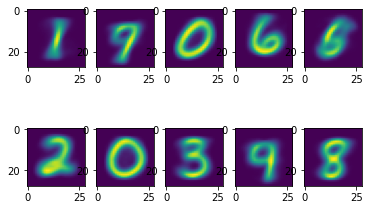

In [ ]:
kmeans = KMeans(K=10, max_iteration='auto', mode_init='kmeans++')
result = kmeans.fit_predict(dataset=X)
clusters = result[0]
J = result[1]
print('.................')
print('k-means++ initialization')
print(f'J: {J}')
fig = plt.figure()
element = 1
for center in kmeans.clusters_centers:
  img = np.array(center).reshape((28, 28))
  fig.add_subplot(2, 5, element)
  plt.imshow(img)
  element += 1

Centers initialized...
Iteration 0 started...
Iteration 0 finished...
----------------------------------
Iteration 1 started...
Iteration 1 finished...
----------------------------------
Iteration 2 started...
Iteration 2 finished...
----------------------------------
Iteration 3 started...
Iteration 3 finished...
----------------------------------
Iteration 4 started...
Iteration 4 finished...
----------------------------------
Iteration 5 started...
Iteration 5 finished...
----------------------------------
Iteration 6 started...
Iteration 6 finished...
----------------------------------
Iteration 7 started...
Iteration 7 finished...
----------------------------------
Iteration 8 started...
Iteration 8 finished...
----------------------------------
Iteration 9 started...
Iteration 9 finished...
----------------------------------
Iteration 10 started...
Iteration 10 finished...
----------------------------------
Iteration 11 started...
Iteration 11 finished...
------------------------

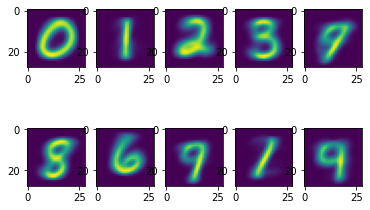

In [ ]:
kmeans = KMeans(K=10, max_iteration='auto', mode_init='cheat')
result = kmeans.fit_predict(dataset=X)
clusters = result[0]
J = result[1]
print('.................')
print('Cheating initialization')
print(f'J: {J}')
fig = plt.figure()
element = 1
for center in kmeans.clusters_centers:
  img = np.array(center).reshape((28, 28))
  fig.add_subplot(2, 5, element)
  plt.imshow(img)
  element += 1

Centers initialized...
Iteration 0 started...
Iteration 0 finished...
----------------------------------
Iteration 1 started...
Iteration 1 finished...
----------------------------------
Iteration 2 started...
Iteration 2 finished...
----------------------------------
Iteration 3 started...
Iteration 3 finished...
----------------------------------
Iteration 4 started...
Iteration 4 finished...
----------------------------------
Iteration 5 started...
Iteration 5 finished...
----------------------------------
Iteration 6 started...
Iteration 6 finished...
----------------------------------
Iteration 7 started...
Iteration 7 finished...
----------------------------------
Iteration 8 started...
Iteration 8 finished...
----------------------------------
Iteration 9 started...
Iteration 9 finished...
----------------------------------
Iteration 10 started...
Iteration 10 finished...
----------------------------------
Iteration 11 started...
Iteration 11 finished...
------------------------

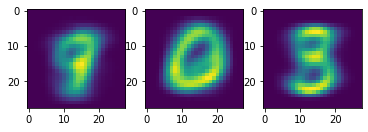

In [ ]:
kmeans = KMeans(K=3, max_iteration='auto', mode_init='kmeans++')
result = kmeans.fit_predict(dataset=X)
clusters = result[0]
J = result[1]
print('.................')
print(f'J: {J}')
fig = plt.figure()
element = 1
for center in kmeans.clusters_centers:
  img = np.array(center).reshape((28, 28))
  fig.add_subplot(1, 3, element)
  plt.imshow(img)
  element += 1

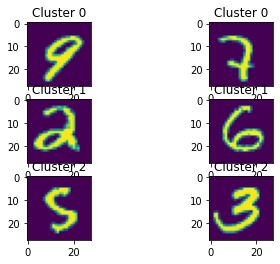

In [ ]:
element = 1
fig = plt.figure()
cluster_0 = clusters[0]
cluster_1 = clusters[1]
cluster_2 = clusters[2]

img_rnd_cluster_0_1 = np.array(cluster_0[rnd.randint(0, len(cluster_0))]).reshape((28, 28))
img_rnd_cluster_0_2 = np.array(cluster_0[rnd.randint(0, len(cluster_0))]).reshape((28, 28))

img_rnd_cluster_1_1 = np.array(cluster_1[rnd.randint(0, len(cluster_1))]).reshape((28, 28))
img_rnd_cluster_1_2 = np.array(cluster_1[rnd.randint(0, len(cluster_1))]).reshape((28, 28))

img_rnd_cluster_2_1 = np.array(cluster_2[rnd.randint(0, len(cluster_2))]).reshape((28, 28))
img_rnd_cluster_2_2 = np.array(cluster_2[rnd.randint(0, len(cluster_2))]).reshape((28, 28))

fig.add_subplot(3, 2, element)
plt.title('Cluster 0')
plt.imshow(img_rnd_cluster_0_1)
element += 1

fig.add_subplot(3, 2, element)
plt.title('Cluster 0')
plt.imshow(img_rnd_cluster_0_2)
element += 1

fig.add_subplot(3, 2, element)
plt.title('Cluster 1')
plt.imshow(img_rnd_cluster_1_1)
element += 1

fig.add_subplot(3, 2, element)
plt.title('Cluster 1')
plt.imshow(img_rnd_cluster_1_2)
element += 1

fig.add_subplot(3, 2, element)
plt.title('Cluster 2')
plt.imshow(img_rnd_cluster_2_1)
element += 1

fig.add_subplot(3, 2, element)
plt.title('Cluster 2')
plt.imshow(img_rnd_cluster_2_2)
element += 1